In [1]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from imblearn.over.sampling import RandomOverSampler, SMOTE

In [2]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\65924\anaconda\lib\site-packages (0.9.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('combined_profile_delete_cleaned.csv')
# df.info()
df['status']= df['status'].apply(lambda x:x.strip())
df['gender']= df['gender'].apply(lambda x:x.strip())
df

,username,age,occupation,status,gender,filtered sentence,y
0,sandralee,19,student,single,female,Im really chill person looking someone chill I...,0
1,dayana16,19,estudiante,single,female,white Bisexual Other nonsmoker occasional drin...,0
2,Denn_,19,Estudiante,single,female,hispanic Bisexual Atheist nonsmoker never Fun ...,0
3,Gabrielita,19,Estudiante,single,female,hispanic Bisexual Christian nonsmoker never Se...,0
4,Luisa5401,19,Estudiante,single,female,hispanic Straight Other nonsmoker never Fun Fr...,0
...,...,...,...,...,...,...,...
7929,devortedman900,69,Engineer,widow,male,I told I great sense humour judge I would desc...,1
7930,antonie07,71,self employed,divorced,male,I determined cheerful happy whatever situation...,1
7931,wesleyclary,72,military,widow,male,Yea loving caring man honest fault always loya...,1
7932,charitywork,73,self-employed,widow,female,good investor good heart help needy poor,1


In [4]:
df['y'].value_counts()

0    5275
1    2659
Name: y, dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['occupation'].unique().tolist()

['student',
 'estudiante',
 'Estudiante',
 'Student',
 'Estudio',
 'Gerente',
 'Estudiante de Derecho',
 'Unemployed',
 'Educator',
 'ESTUDIO',
 'Camarera',
 'Manicurista',
 'Universitaria',
 'Niñera',
 'Estudios',
 'Independiente',
 'Estudiar',
 'Manager',
 'secretaria',
 'Plomero',
 'Contador',
 'Salesman',
 'Emprendedora',
 'Estudiando',
 'Trabajo',
 'Enfermera',
 'Clerk',
 'Waitress',
 'Estudiante universitario',
 'Construction',
 'Baker',
 'Self Employed',
 'Ama de casa',
 'Comerciante',
 'maestra',
 'Ingeniero',
 'Administradora de empresas',
 'Teacher',
 'Tecnico',
 'Secretaria',
 'Oficina',
 'Barbero',
 'Estudio y trabajo',
 'Esteticista',
 'Journalist',
 'Nurse',
 'Customer service',
 'Landscaping',
 'Maestra',
 'Atención al cliente',
 'Pintor',
 'Chef',
 'Barista',
 'Futbolista',
 'Laboro',
 'Estilista',
 'Construccion',
 'Musico',
 'ESTUDIANTE',
 'Electricista',
 'Lawyer',
 'Universidad',
 'Periodistas',
 'Nursing',
 'military',
 'Digitador',
 'cajera',
 'Engineer',
 'Conduc

In [7]:
df['occupation'].value_counts()

 military           346
 self employed      271
 student            262
 engineer           209
Estudiante          164
                   ... 
Electric              2
 civil servant        2
Deportista            2
Carpinter             2
 Sales/Marketing      1
Name: occupation, Length: 947, dtype: int64

In [34]:
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)

In [36]:
# binning for age column
bins=[18,34,48,60,95]
label=['18-34','35-48','49-60','61-85']
df['age_group']= pd.qcut(df['age'],4)

In [10]:
# label encoding for age column
df['age_group_encoded'] = labelencoder.fit_transform(df['age_group'])

In [11]:
df['age_group_encoded'].value_counts()

0    2130
2    1963
1    1941
3    1900
Name: age_group_encoded, dtype: int64

In [12]:
# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded']]
X.sample(10)


,status_encoded,gender_encoded,age_group_encoded
3470,0,1,2
4267,0,1,3
3854,3,1,2
222,4,1,0
2196,4,1,1
1560,4,1,1
5378,4,0,0
3744,4,1,2
397,1,0,0
1713,4,1,1


In [44]:
df[df['status']=='married']

,username,age,occupation,status,gender,filtered sentence,y,status_encoded,gender_encoded,age_group,age_group_encoded
58,Jon2511,22,Trabajo,married,male,native american Bisexual Other nonsmoker never...,0,2,1,"(17.999, 33.0]",0
624,Gabby29,29,Construccion,married,male,hispanic Straight Other nonsmoker occasional d...,0,2,1,"(17.999, 33.0]",0
746,Dominate,30,Mechanic,married,male,mixed Straight Christian nonsmoker never Fun,0,2,1,"(17.999, 33.0]",0
757,Enriiqer,30,Independiente,married,male,hispanic Straight Christian chain smoker socia...,0,2,1,"(17.999, 33.0]",0
828,Ritore85,30,Comercial,married,male,hispanic Straight Christian nonsmoker never Fu...,0,2,1,"(17.999, 33.0]",0
...,...,...,...,...,...,...,...,...,...,...,...
4905,coolalone,62,Business,married,male,I trusted honest loving caring earth love trav...,0,2,1,"(51.0, 85.0]",3
4909,Macadoo,62,retired,married,male,Love outdoor animals playing golf,0,2,1,"(51.0, 85.0]",3
5014,Anjie,64,Paralegal,married,female,white Straight Other nonsmoker occasional drin...,0,2,0,"(51.0, 85.0]",3
5152,John29903,68,Sales,married,male,Youll laugh sense humor contagious Friends des...,0,2,1,"(51.0, 85.0]",3


In [14]:
df.iloc[345]['status']

'single'

In [15]:
# target
y = df["y"]

In [16]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [17]:
# initialise Decision Tree
clf = DecisionTreeClassifier(criterion='entropy',random_state=256) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=256)

[Text(0.6527777777777778, 0.9375, 'X[0] <= 5.0\nentropy = 0.923\nsamples = 3173\nvalue = [2101, 1072]'),
 Text(0.39444444444444443, 0.8125, 'X[1] <= 0.5\nentropy = 0.839\nsamples = 2787\nvalue = [2039, 748]'),
 Text(0.2, 0.6875, 'X[2] <= 1.5\nentropy = 0.964\nsamples = 1061\nvalue = [649, 412]'),
 Text(0.1111111111111111, 0.5625, 'X[2] <= 0.5\nentropy = 0.999\nsamples = 768\nvalue = [367, 401]'),
 Text(0.06666666666666667, 0.4375, 'X[0] <= 3.5\nentropy = 0.951\nsamples = 494\nvalue = [183, 311]'),
 Text(0.044444444444444446, 0.3125, 'X[0] <= 0.5\nentropy = 0.887\nsamples = 23\nvalue = [16, 7]'),
 Text(0.022222222222222223, 0.1875, 'entropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.06666666666666667, 0.1875, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.08888888888888889, 0.3125, 'entropy = 0.938\nsamples = 471\nvalue = [167, 304]'),
 Text(0.15555555555555556, 0.4375, 'X[0] <= 3.5\nentropy = 0.913\nsamples = 274\nvalue = [184, 90]'),
 Text(0.13333333333333333, 0.3125, 

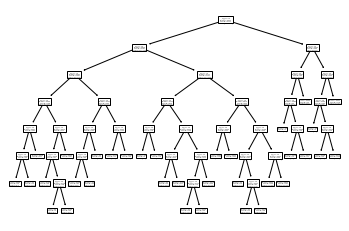

In [18]:
tree.plot_tree(clf)

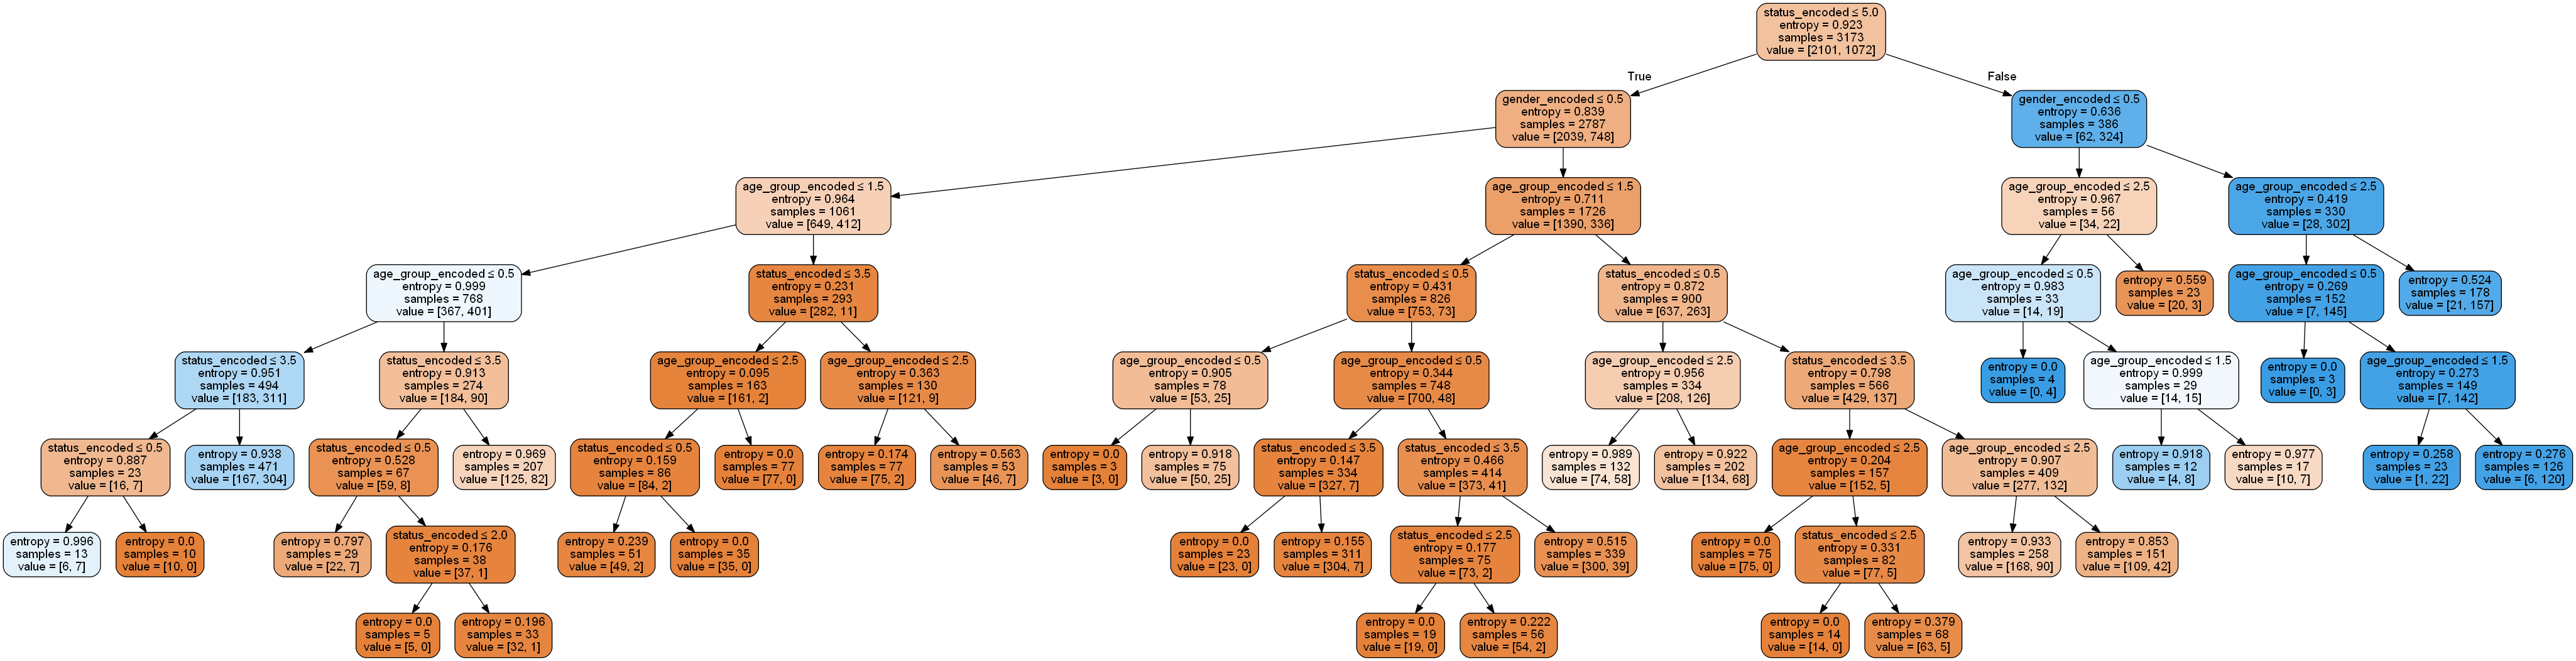

In [19]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
5206,0,0
1139,0,0
6483,1,0
1122,0,0
1571,0,0
3150,0,0
1787,0,0
3149,0,0
4418,0,0
426,0,1


In [21]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.7939508506616257


In [22]:
# Precision and Recall
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

Precision: 0.7408585055643879
Recall: 0.5872715816005041
F-measure: 0.6551845342706503


In [53]:
data = [[58,'married','male']]
testdf = pd.DataFrame(data, columns=['age', 'status','gender'])
testdf['age_group_encoded'] = 3
testdf['status_encoded'] = 2
testdf['gender_encoded'] = 1
test = testdf[['status_encoded','gender_encoded','age_group_encoded']]
pred = clf.predict(test)
results = pd.DataFrame({'Pred': pred})
results

,Pred
0,0


Feature Enginnering 

In [23]:
# create a copy of the dataframe
engineer_df = df.copy()
engineer_df.sample(5)

,username,age,occupation,status,gender,filtered sentence,y,status_encoded,gender_encoded,age_group,age_group_encoded
3901,Marioponce,50,Cook,separated,male,hispanic Straight Christian social smoker soci...,0,3,1,"(42.0, 51.0]",2
1084,JuanManuel19,32,Recursos humanos,single,male,hispanic Straight Christian nonsmoker social d...,0,4,1,"(17.999, 33.0]",0
7154,D_wehemeyer,51,military,widow,male,I Brave intelligent US Soldier I honest trustw...,1,6,1,"(42.0, 51.0]",2
6835,Notime4games,47,Underground Mining,divorced,male,I believe life work progress There many things...,1,0,1,"(42.0, 51.0]",2
4156,Queno,52,Empresario,divorced,male,hispanic Straight Other nonsmoker never Seriou...,0,0,1,"(51.0, 85.0]",3


In [24]:
# feature aggregate 
engineer_df[""] = engineer_df[""] + engineer_df[""]
engineer_df.sample(5)

KeyError: ''

Modelling Features 

In [ ]:
# Features
X = engineer_df[["",""]]
# Target
y = engineer_df[""]
X.sample(5)

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Decision Tree

In [ ]:
# Train model
dt_clf = DecisionTreeClassifier(criterion='gini')  
dt_clf.fit(X_train, y_train)

In [ ]:
feature_cols = ["",""]

dot_data = StringIO()
export_graphviz(dt_clf, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Compare results
dt_predictions = dt_clf.predict(X_test)
dt_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
dt_results_df.sample(10)

In [ ]:
# Accuracy
dt_accuracy = accuracy_score(y_test,dt_predictions)
print("Accuracy:",dt_accuracy)

In [ ]:
# Precision and Recall
dt_precision = metrics.precision_score(y_test, dt_predictions)
dt_recall = metrics.recall_score(y_test, dt_predictions)
dt_f_measure = metrics.f1_score(y_test, dt_predictions)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F-measure:",dt_f_measure)

Decision Tree data split visulisation 

In [ ]:
groups = engineer_df.groupby("fraud")
for name, group in groups:
    plt.plot(group[""], group[""], marker="o", linestyle="", label=name)
plt.plot([9.4,9.4], [1,9], linestyle='-')
plt.plot([5,12], [1.65,1.65], linestyle='-')
plt.legend()
plt.show()